# Qiskit 1.x tutorial video 3

[Youtube link](https://youtu.be/93-zLTppFZw?si=7nVAki9fnVfB4wET)

2-qubit bell state

Qiskit patterns workflow.

**setup**

In [1]:
import qiskit

qiskit.__version__

from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(channel="ibm_quantum",
                               token='api_token')


In [ ]:
QiskitRuntimeService.save_account(channel="ibm_quantum", 
                                  token='api_token')

In [7]:
backend = service.backend(name="ibm_brisbane")

In [8]:
backend.num_qubits

127

## Step 1: Map the problem to circuits and operators

In [1]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)

qc.h(0)
qc.cx(0, 1)

qc.draw(output='mpl')

ImportError: Qiskit is installed in an invalid environment that has both Qiskit >=1.0 and an earlier version. You should create a new virtual environment, and ensure that you do not mix dependencies between Qiskit <1.0 and >=1.0. Any packages that depend on 'qiskit-terra' are not compatible with Qiskit 1.0 and will need to be updated. Qiskit unfortunately cannot enforce this requirement during environment resolution. See https://qisk.it/packaging-1-0 for more detail.

Map the problem to operators.

First, measure expvalues of some 2qubit ops and 1qubit ops.

ZZ and XX should have non-zero expvalue. ZI, IZ, IX should have 0 expvalue. Signature of entanglement.

In [7]:
# Create operators to measure them using backend

from qiskit.quantum_info import Pauli

ZZ = Pauli('ZZ')
ZI = Pauli('ZI')
IZ = Pauli('IZ')
XX = Pauli('XX')
XI = Pauli('XI')
IX = Pauli('IX')

observables = [ZZ, ZI, IZ, XX, XI, IX]



## Step 2: Optimize circuit observables

Air simulator actually handles that step...

## Step 3: Execute on backend

Access the simulator primitive.

In [8]:
from qiskit_aer.primitives import Estimator

estimator = Estimator()

job = estimator.run([qc] * len(observables), observables) # for v1 primitives (estimator) num of circuits should be the same as the number of observables

job.result()

# We get expvalues

EstimatorResult(values=array([ 1.        ,  0.00390625,  0.00390625,  1.        , -0.01367188,
       -0.01367188]), metadata=[{'shots': 1024, 'variance': 0.0, 'simulator_metadata': [{'time_taken': 0.006999518, 'num_bind_params': 1, 'parallel_state_update': 12, 'parallel_shots': 1, 'required_memory_mb': 0, 'input_qubit_map': [[1, 1], [0, 0]], 'method': 'stabilizer', 'device': 'CPU', 'num_qubits': 2, 'sample_measure_time': 0.000236842, 'active_input_qubits': [0, 1], 'num_clbits': 2, 'remapped_qubits': False, 'runtime_parameter_bind': False, 'max_memory_mb': 15293, 'noise': 'ideal', 'measure_sampling': True, 'batched_shots_optimization': False, 'fusion': {'enabled': False}}]}, {'shots': 1024, 'variance': 0.9999847412109375, 'simulator_metadata': [{'time_taken': 0.006999518, 'num_bind_params': 1, 'parallel_state_update': 12, 'parallel_shots': 1, 'required_memory_mb': 0, 'input_qubit_map': [[1, 1], [0, 0]], 'method': 'stabilizer', 'device': 'CPU', 'num_qubits': 2, 'sample_measure_time': 0.

## Step 4: Postprocess and plotting

Postprocess is already handled

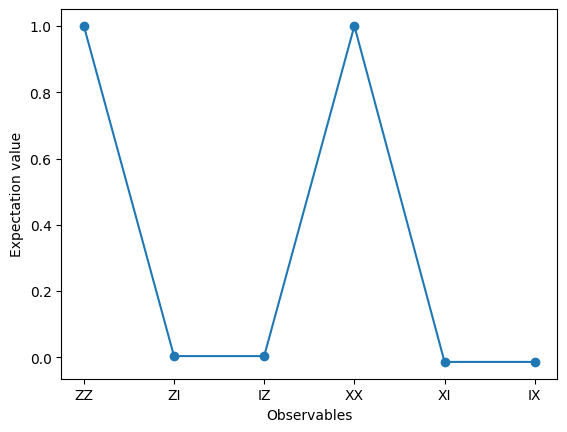

In [9]:
import matplotlib.pyplot as plt

data = ['ZZ', 'ZI', 'IZ', 'XX', 'XI', 'IX']
values = job.result().values

plt.plot(data, values, '-o')
plt.xlabel('Observables')
plt.ylabel('Expectation value')
plt.show()


# Part 2. Extend Hello world example to an $n$-qubits GHZ state

$|\psi\rangle = \frac{1}{\sqrt 2}(|\underbrace{00 \dots 0}_{n} \rangle + | \underbrace{11 \dots 1}_{n} \rangle)$

## Step 1: Map the problem to circuits and operators

In [10]:
def get_qc_for_n_qubit_GHZ_state(n):
    qc = QuantumCircuit(n)
    qc.h(0)
    for i in range(n-1):
        qc.cx(i, i+1)
    return qc

n = 100
qc = get_qc_for_n_qubit_GHZ_state(n)
#qc.draw(output='mpl')

How noisy large scale device? Correlation of qubits with increase of distance. Expect - more noice with higher distance (expvalues are corrupted)

Looking at $ZZ$ ops between qubits.

Expect $ZZ$ between $q_0$ and $q_1$ be the biggest. Between $q_0$ and $q_9$ be the most noisy.



In [11]:
from qiskit.quantum_info import SparsePauliOp
# Large sparse pauliops that takes a lot of space

operator_strings = ['Z' + 'I'*i + 'Z' + 'I'*(n-2-i) for i in range(n-1)]
print(operator_strings)
print(len(operator_strings))

operators = [SparsePauliOp(operator_string) for operator_string in operator_strings]


['ZZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII

## Step 2: Optimize the problem for quantum execution

**Transpile** the circuit for the backend, s.t. it matches local connectivity, native gate requirements (also can merge 2-qubit gates etc.) - EXPERTISE OF QC (make the circuit as easily executable as possible).

Not now. Now very simple transpilation, not long for classical.

Backend - get configurations of backend to know how to **transpile**.

In [12]:
from qiskit_ibm_runtime import QiskitRuntimeService
# to access backend
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
# generate a preset pass manager based on backend imported

backend_name = "ibm_brisbane" #127 qubit device with pretty good performance
backend = QiskitRuntimeService().backend(backend_name)
pass_manager = generate_preset_pass_manager(optimization_level=1, backend=backend) # simple optimization, all the backend configs like connectivity of native gates

qc_transpiled = pass_manager.run(qc)
operators_transpiled_list = [op.apply_layout(qc_transpiled.layout) for op in operators] # originaly in order of 1 to 100, but then mapping to the q device, all the indices gets swapped. Make sure that indices get mapped correctly to the transpiled quantum circuit.


## Step 3: Execute on the backend
the transpiled stuff

In [13]:
from qiskit_ibm_runtime import EstimatorV2 as Estimator # Submission and looking at results more intuitive
from qiskit_ibm_runtime import EstimatorOptions # config how op behaves

options = EstimatorOptions()
options.resilience_level = 1 # measurements without mitigation, 2 would be zero noice interpolation
#options.optimization_level = 0 # transpolation done locally
options.dynamical_decoupling.enable = True # insert pulses into iotime to get rid of crosstalk and other coherent errors
options.dynamical_decoupling.sequence_type = "XY4"

estimator = Estimator(backend, options=options)

job = estimator.run([(qc_transpiled, operators_transpiled_list)])
job_id = job.job_id()
print(job_id)


cxk0sanky7rg008490rg


## Step 4: Post-process and plot

In [16]:
service = QiskitRuntimeService()
job_id = "cxk0jpafdnwg008spv10"
job = service.job(job_id)

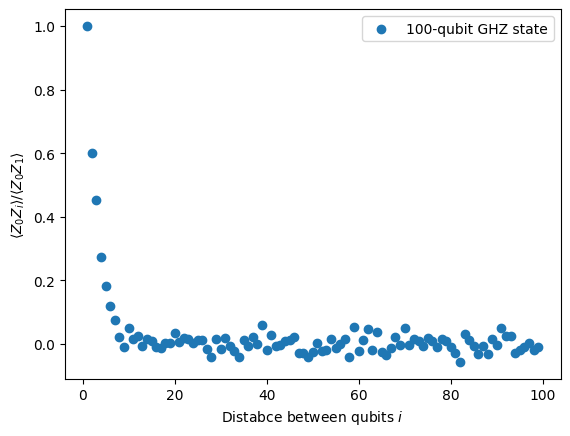

In [17]:
import matplotlib.pyplot as plt

data = list(range(1, len(operators)+1))
results = job.result()[0] # exp value of each of ones (0 - only one circuit of observables)
values = results.data.evs 
values = [v / values[0] for v in values]

plt.scatter(data, values, marker='o', label='100-qubit GHZ state')
plt.xlabel('Distance between qubits $i$')
plt.ylabel(r'$\langle Z_0 Z_i \rangle / \langle Z_0 Z_1 \rangle$')
plt.legend()
plt.show()